In [1]:
import cv2 
%matplotlib inline
from PIL import Image
from matplotlib import pyplot as plt
import keras.layers as LL
import numpy as np
import pandas as pd
from keras import losses
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Conv2D 
from keras.layers import GlobalMaxPooling2D
from keras.layers import MaxPooling2D
from keras.layers import Activation

Using TensorFlow backend.
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [5]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "DisDataset.zip"
  

with ZipFile(file_name, 'r') as zipp: 
    # printing all the contents 
    zipp.printdir() 
  
    # extracting the files 
    zipp.extractall() 
    print('Done!') 

File Name                                             Modified             Size
imagesdis/                                     2020-06-25 18:11:54            0
imagesdis/image-0.jpg                          2020-06-25 18:02:06       238194
imagesdis/image-1.jpg                          2020-06-25 18:02:06       232009
imagesdis/image-10.jpg                         2020-06-25 18:02:12       454740
imagesdis/image-100.jpg                        2020-06-25 18:03:10       189953
imagesdis/image-1000.jpg                       2020-06-25 18:11:16        98439
imagesdis/image-1001.jpg                       2020-06-25 18:11:16       106362
imagesdis/image-1002.jpg                       2020-06-25 18:11:18       101718
imagesdis/image-1003.jpg                       2020-06-25 18:11:18       102774
imagesdis/image-1004.jpg                       2020-06-25 18:11:18        96546
imagesdis/image-1005.jpg                       2020-06-25 18:11:20        91935
imagesdis/image-1006.jpg                

Done!


In [7]:
df = pd.read_csv("3Dataset.csv")
df.values
df

,PLANTS,AGE,CATEGORY
0,imagesdis\image-0.jpg,5,YOUNG
1,imagesdis\image-1.jpg,10,YOUNG
2,imagesdis\image-2.jpg,17,ADOLESCENT
3,imagesdis\image-3.jpg,27,ADOLESCENT
4,imagesdis\image-4.jpg,6,YOUNG
...,...,...,...
1061,imagesdis\image-1061.jpg,15,ADOLESCENT
1062,imagesdis\image-1062.jpg,17,ADOLESCENT
1063,imagesdis\image-1063.jpg,1,YOUNG
1064,imagesdis\image-1064.jpg,23,ADOLESCENT


In [8]:
imgs=df['PLANTS'][1]
print(imgs)
category=df["CATEGORY"][1]
print(category)
df['CATEGORY']

imagesdis\image-1.jpg
YOUNG


0            YOUNG
1            YOUNG
2       ADOLESCENT
3       ADOLESCENT
4            YOUNG
           ...    
1061    ADOLESCENT
1062    ADOLESCENT
1063         YOUNG
1064    ADOLESCENT
1065    ADOLESCENT
Name: CATEGORY, Length: 1066, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

y_age = df["CATEGORY"]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_age)
encoded_Y = encoder.transform(y_age)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_age = np_utils.to_categorical(encoded_Y)
print(dummy_y_age)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
N = df.shape[0]
print(N)
imgs = [None] * N
t=[None]*N
print(dummy_y_age.shape)

1066
(1066, 3)


In [10]:
for i in range(N):
    t[i]= df["CATEGORY"][i]
print(t)

['YOUNG', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'YOUNG', 'ADOLESCENT', 'YOUNG', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'ADOLESCENT', 'YOUNG', 'YOUNG', 'ADOLES

In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

for i in range(N):
    I = Image.open(df["PLANTS"][i])
    I = I.resize((640,360), Image.ANTIALIAS)
    crop=I.crop((0, 46, 640, 360))
    imgs[i] = np.array(crop)
    
len(imgs)

1066

In [12]:
for i in range(N):
    c=imgs[i].shape
    print(c)
print(imgs[0])

(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 640, 3)
(314, 

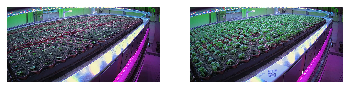

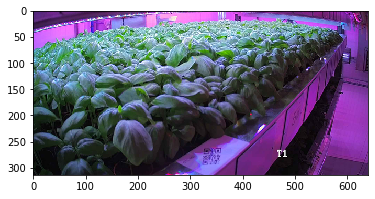

In [13]:
plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
plt.show()
imgfromarray=[None]*N
for i in range(N):
    imgfromarray[i]= Image.fromarray(imgs[i], 'RGB')
    
plt.imshow(imgfromarray[170])



(0, 255)

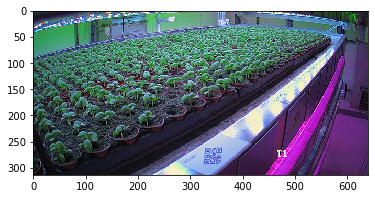

In [14]:
plt.imshow(imgfromarray[1])

imgs[1].min(), imgs[1].max()

In [16]:
def isGreen(r,g,b):
    if g < 50:
        return False
    if g*1.25  < r:
        return False
    if g*1.25 < b:
        return False
    return True

def countGreenPixels(imgs):
    gpc = 0 #Green pixel count
    for row in enumerate(imgs):
        for pixel in enumerate(row):
            b, g, r = pixel
            if not isGreen(r,g,b):
                    pixel[0] = 255
                    pixel[1] = 255
                    pixel[2] = 255
            else:
                    gpc += 1
           
    return gpc

In [17]:
def gpc():
    return countGreenPixels(imgs)

In [19]:
for i in range(N):
    c=countGreenPixels(imgs[i])
    print(c)
    
    

74835
90824
93988
82554
85243
90184
68311
77421
94225
91665
92423
100008
92765
77753
82045
78323
64827
65008
95683
96686
95283
98985
98313
96395
88586
90113
99230
97473
78606
87736
53772
81528
88888
93814
69368
95400
79996
72646
71290
96318
73296
80052
81309
95186
76116
93205
99344
82386
73496
85900
94158
89908
93228
94294
105691
74653
75409
84097
93299
96104
72499
80533
95168
95478
94912
75536
82031
94343
98733
66772
98509
91335
71751
78199
90374
97719
94035
84072
79368
82633
74722
72529
86935
89305
79852
72624
70255
95633
74928
83609
83953
92746
78527
64624
74139
93442
78303
96293
88602
81888
91293
68373
99681
84205
90504
100250
90521
80295
73194
89940
84528
71112
94744
74635
94530
91742
80424
96919
78260
94895
83690
87846
84157
71364
85950
70672
93090
86537
116120
33924
76522
111757
108451
99737
26378
105296
18210
96627
90658
105970
114495
115270
69833
17762
112219
15886
23003
86795
71878
103981
105563
87114
112386
109720
89172
105792
76043
84305
111241
81805
113576
75854
69633
1158

In [24]:
ready_images=[]
ready_images.clear()
for i in range(N):
    ready_images.append(imgs[i])
    


In [25]:
len(ready_images)

1066

In [34]:
for i, image in enumerate(ready_images):
    Image.fromarray(image).save('{}{}{}'.format('readyimages/image-', i,'.jpg'))

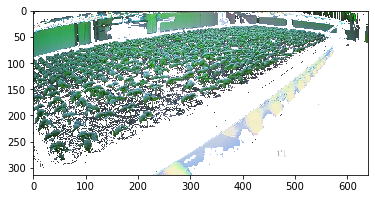

In [20]:
plt.imshow(imgs[1])